In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [9]:
cities[1]

'shieli'

In [46]:
#key = weather_api_key
#unit = 'imperial'
#city_name = cities[1]
#final_url = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&units={unit}&appid={key}'
#data = requests.get(final_url).json()

#date = data['dt']
#country = data['sys']['country']
#lat = data['coord']['lat']
#lng = data['coord']['lon']
#temp = data['main']['temp']
#cness = data['clouds']['all']
#hum = data['main']['humidity']
#wspeed = data['wind']['speed']
#print(lat, lng, temp, cness, hum, wspeed, date, country)

In [47]:
cities_w_data = []
lats_data = []
longs_data = []
temps = []
cnesses = []
hums = []
wspeeds = []
dates = []
country_codes = []

key = weather_api_key
unit = 'imperial'
for x in range (0, len(cities)):
    try:
        city_name = cities[x]
        final_url = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&units={unit}&appid={key}'
        data = requests.get(final_url).json()
        lat = data['coord']['lat']
        lats_data.append(lat)
        lng = data['coord']['lon']
        longs_data.append(lng)
        temp = data['main']['temp_max']
        temps.append(temp)
        cness = data['clouds']['all']
        cnesses.append(cness)
        hum = data['main']['humidity']
        hums.append(hum)
        wspeed = data['wind']['speed']
        wspeeds.append(wspeed)
        date = data['dt']
        dates.append(date)
        country = data['sys']['country']
        country_codes.append(country)
        print(f'working on record {x+1}: {city_name}')
        cities_w_data.append(city_name)
    except KeyError:
        print(f'City {city_name} not found, skipping.')
        continue

working on record 1: belle fourche
working on record 2: shieli
working on record 3: east london
working on record 4: athabasca
City utiroa not found, skipping.
working on record 6: rikitea
working on record 7: busselton
working on record 8: tuktoyaktuk
working on record 9: homer
working on record 10: cape town
working on record 11: butaritari
working on record 12: qaanaaq
working on record 13: albany
working on record 14: mataura
working on record 15: poum
working on record 16: valley city
working on record 17: pontes e lacerda
working on record 18: lang son
working on record 19: kasongo-lunda
working on record 20: oranjemund
working on record 21: sur
working on record 22: atuona
working on record 23: chokurdakh
working on record 24: bilibino
working on record 25: zeya
working on record 26: solwezi
working on record 27: vaini
working on record 28: cabo san lucas
working on record 29: luderitz
City nizhneyansk not found, skipping.
working on record 31: bredasdorp
working on record 32: k

working on record 254: warwick
working on record 255: iskateley
working on record 256: karatau
working on record 257: yarada
working on record 258: jarinu
working on record 259: waingapu
working on record 260: casma
working on record 261: longyearbyen
working on record 262: dingle
working on record 263: mackay
working on record 264: north bend
working on record 265: manaus
working on record 266: saint-pierre
City amderma not found, skipping.
working on record 268: minot
working on record 269: santa vitoria do palmar
working on record 270: gejiu
working on record 271: thompson
working on record 272: port elizabeth
working on record 273: maceio
working on record 274: virovitica
working on record 275: lufilufi
working on record 276: sterling
working on record 277: kandrian
working on record 278: yagodnoye
working on record 279: grand forks
working on record 280: laguna
working on record 281: ballina
City vaitupu not found, skipping.
working on record 283: cabinda
working on record 284: co

working on record 506: catamarca
working on record 507: abu samrah
working on record 508: dalvik
working on record 509: faya
working on record 510: trairi
working on record 511: andenes
working on record 512: rafsanjan
working on record 513: emerald
City marcona not found, skipping.
working on record 515: sri aman
working on record 516: nakhon thai
working on record 517: kedrovyy
working on record 518: chapais
working on record 519: bonavista
working on record 520: venice
working on record 521: pechora
working on record 522: madimba
working on record 523: san rafael
working on record 524: vardo
working on record 525: liberal
working on record 526: kikwit
working on record 527: mabaruma
working on record 528: sao joao da barra
working on record 529: suleja
working on record 530: margate
working on record 531: council bluffs
working on record 532: uige
working on record 533: torbay
working on record 534: iquitos
working on record 535: samarai
working on record 536: salina
working on reco

In [48]:
#making sure lists are all of same length
print(len(cities_w_data))
print(len(lats_data))
print(len(longs_data))
print(len(temps))
print(len(cnesses))
print(len(hums))
print(len(wspeeds))
print(len(dates))
print(len(country_codes))

564
564
564
564
564
564
564
564
564


In [49]:
#creating df for weather info
weather_data_df = pd.DataFrame({'city_name': cities_w_data,
                                'lat': lats_data,
                                'long': longs_data,
                                'temp': temps,
                                'cloudiness': cnesses,
                                'humidity': hums,
                                'wind_speed': wspeeds,
                                'country_code': country_codes,
                                'date_of_measurement': dates
                               })
#checking df length
print(len(weather_data_df))
#checking for any null values
print(weather_data_df.isnull().value_counts())
#printing sample of data
weather_data_df.sample(10)

564
city_name  lat    long   temp   cloudiness  humidity  wind_speed  country_code  date_of_measurement
False      False  False  False  False       False     False       False         False                  564
dtype: int64


,city_name,lat,long,temp,cloudiness,humidity,wind_speed,country_code,date_of_measurement
256,ballina,-28.87,153.57,72.00,79,64,11.41,AU,1608667225
122,keti bandar,24.14,67.45,66.00,0,40,7.81,PK,1608667195
269,vrangel,42.73,133.08,26.96,0,85,6.33,RU,1608667226
559,teya,60.38,92.63,-15.39,100,85,2.42,RU,1608667246
59,yellowknife,62.46,-114.35,-16.60,90,75,5.82,CA,1608667192
118,amatitan,20.83,-103.72,77.00,75,22,4.70,MX,1608667195
268,mercedes,-34.65,-59.43,91.99,0,24,8.99,AR,1608666967
398,rangapara,26.82,92.65,55.74,0,55,3.02,IN,1608667235
210,leningradskiy,69.38,178.42,-10.30,100,88,13.60,RU,1608667201
65,novosokolniki,56.35,30.16,28.51,99,93,11.83,RU,1608667192


In [50]:
weather_data_df['humidity'].max()

100

In [51]:
output_path = 'outputs/cities.csv'
weather_data_df.to_csv(output_path)

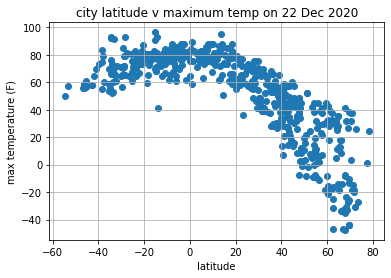

In [53]:
#scatter for temp v. lat
x_axis1 = weather_data_df['lat']
y_axis1 = weather_data_df['temp']
plt.title('city latitude v maximum temp on 22 Dec 2020')
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.grid()
plt.scatter(x_axis1, y_axis1)
plt.show()

The above plot shows the maximum temperature (F) of 564 randomly selected cities, taken on 22 December 2020, and compares those temperatures to each city's latitude (degrees north or south of the equator). 

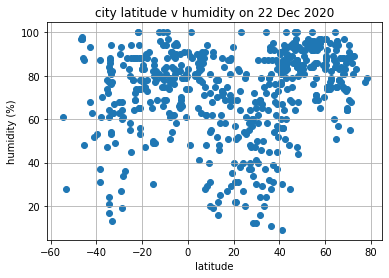

In [54]:
#scatter for hum v. lat
x_axis2 = weather_data_df['lat']
y_axis2 = weather_data_df['humidity']
plt.title('city latitude v humidity on 22 Dec 2020')
plt.xlabel('latitude')
plt.ylabel('humidity (%)')
plt.grid()
plt.scatter(x_axis2, y_axis2)
plt.show()

The above plot shows the humidity of 564 randomly selected cities, taken on 22 December 2020, and compares those humidities to each city's latitude (degrees north or south of the equator).

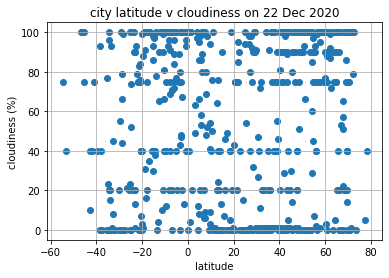

In [58]:
#scatter for cloudiness v. lat
x_axis3 = weather_data_df['lat']
y_axis3 = weather_data_df['cloudiness']
plt.title('city latitude v cloudiness on 22 Dec 2020')
plt.xlabel('latitude')
plt.ylabel('cloudiness (%)')
plt.grid()
plt.scatter(x_axis3, y_axis3)
plt.show()

The above plot shows the cloudiness of 564 randomly selected cities, taken on 22 December 2020, and compares those to each city's latitude (degrees north or south of the equator).

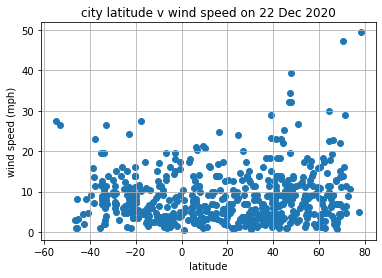

In [60]:
#scatter for wind speed v. lat
x_axis4 = weather_data_df['lat']
y_axis4 = weather_data_df['wind_speed']
plt.title('city latitude v wind speed on 22 Dec 2020')
plt.xlabel('latitude')
plt.ylabel('wind speed (mph)')
plt.grid()
plt.scatter(x_axis4, y_axis4)
plt.show()

The above plot shows the wind speed of 564 randomly selected cities, taken on 22 December 2020, and compares those to each city's latitude (degrees north or south of the equator).